<a href="https://colab.research.google.com/github/wong1han/EC1B1_python-workshop_notebooks/blob/main/EC1B1%20problem%20set%20%202%20additional%20Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EC1B1_problem set 2:

### Medieval Economy Model Problem

Consider the model of the medieval economy discussed in class:

$$\log M_t + \log \overline{V} = \log P_t + \log Y_t$$

$$\log P_{t+1} - \log P_t = \theta (\log Y_t - \log Y^*)$$

**Part (a)**

Suppose $\overline{V} = 1$ and $Y^* = 1$. Calculate the constant output steady state value of $P_t$ when $\log M_t = 1$ for all $t$.

In [3]:
import math

$\log M_t + \log \overline{V} = \log P_t + \log Y_t$

$\log P_{t+1} - \log P_t = \theta (\log Y_t - \log Y^*)$

$\log \overline{V} = 0$

$\log M_t =1$

$ 1= \log P_t + \log Y_t$

$\log Y_t = \log Y^*=0$ (constant output steady state)

$ 1= \log P_t $

**Part (b)**

Suppose that time is measured in years and the economy is in the steady state calculated in part (a) at time $t = -1$. Suppose that at time $t = 0$, Vikings bring back a boatload of gold coins that raises the money supply to $\log M_0 = 3$. Suppose that the money supply remains constant at this level for the next 20 years. Suppose that $\theta = 0.25$. Trace out the dynamics of the logarithm of the price level and the logarithm of output over these 20 years using the two equations from part (a).

You can do this by hand, but it is tedious. To avoid such tedium, you should do this part of the question in Python. Plot the resulting "time series" for the logarithm of output, the logarithm of the price level and the logarithm of the money supply from $t = -1$ to $t = 20$ (i.e. plot each variable as a function of time) using Python.


已知条件：

$\log P_{-1} = 1$

$\theta = 0.25$

$\log M_{0} =3 $

代入公式：

$\log P_{0} - \log P_{-1} = 0.25(\log Y_{-1} - \log Y^*)$

$\log P_{0} - 1 = 0.25 (\log Y_{-1} - \log Y^*)$



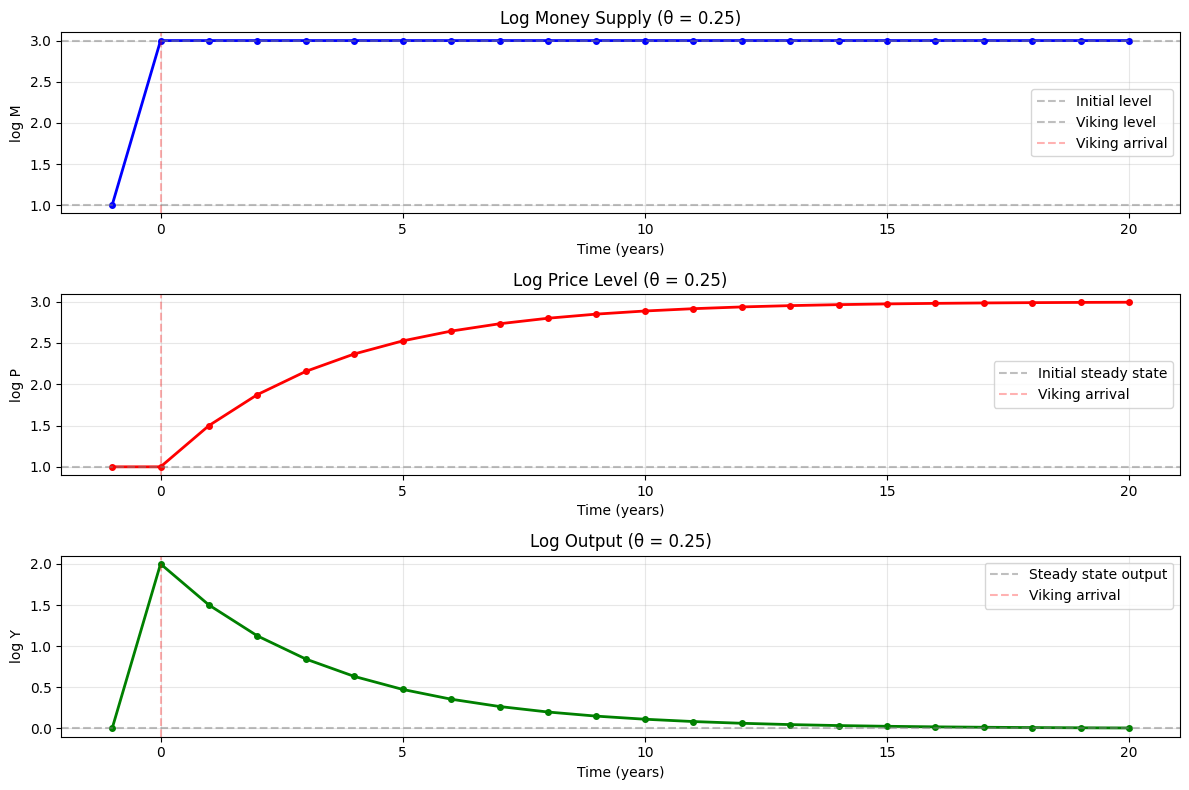

Part (b) Results (θ = 0.25):

Initial steady state (t=-1):
  log M = 1.0000
  log P = 1.0000
  log Y = 0.0000

Immediately after Viking arrival (t=0):
  log M = 3.0000
  log P = 1.0000
  log Y = 2.0000

Final values (t=20):
  log M = 3.0000
  log P = 2.9937
  log Y = 0.0063

Time series data (first 10 periods):
  Time      log M      log P      log Y
------------------------------------------------------------
    -1     1.0000     1.0000     0.0000
     0     3.0000     1.0000     2.0000
     1     3.0000     1.5000     1.5000
     2     3.0000     1.8750     1.1250
     3     3.0000     2.1562     0.8438
     4     3.0000     2.3672     0.6328
     5     3.0000     2.5254     0.4746
     6     3.0000     2.6440     0.3560
     7     3.0000     2.7330     0.2670
     8     3.0000     2.7998     0.2002
     9     3.0000     2.8498     0.1502


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
theta = 0.25
V_bar = 1  # log V_bar = 0
Y_star = 1  # log Y_star = 0
log_V_bar = np.log(V_bar)
log_Y_star = np.log(Y_star)

# Initial conditions (steady state at t = -1)
log_M_initial = 1  # Before Vikings
log_M_vikings = 3  # After Vikings bring gold at t=0

# Time periods
time = np.arange(-1, 21)  # From t=-1 to t=20
n_periods = len(time)

# Initialize arrays
log_M = np.zeros(n_periods)
log_P = np.zeros(n_periods)
log_Y = np.zeros(n_periods)

# Set initial steady state at t=-1 (index 0)
log_M[0] = log_M_initial
# From part (a): in steady state with log M = 1, log V_bar = 0, log Y = 0
# We have: log M + log V_bar = log P + log Y
# So: 1 + 0 = log P + 0, therefore log P = 1
log_P[0] = 1
log_Y[0] = 0  # Steady state output

# Vikings bring gold at t=0, so from t=0 onwards, log M = 3
for i in range(1, n_periods):
    log_M[i] = log_M_vikings


for i in range(1, n_periods):
    log_Y[i] = log_M[i] + log_V_bar - log_P[i-1]
    log_P[i] = log_P[i-1] + theta * (log_Y[i-1] - log_Y_star)
    log_Y[i] = log_M[i] + log_V_bar - log_P[i]


plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, log_M, 'b-', linewidth=2, marker='o', markersize=4)
plt.axhline(y=log_M_initial, color='gray', linestyle='--', alpha=0.5, label='Initial level')
plt.axhline(y=log_M_vikings, color='gray', linestyle='--', alpha=0.5, label='Viking level')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.3, label='Viking arrival')
plt.xlabel('Time (years)')
plt.ylabel('log M')
plt.title('Log Money Supply (θ = 0.25)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, log_P, 'r-', linewidth=2, marker='o', markersize=4)
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5, label='Initial steady state')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.3, label='Viking arrival')
plt.xlabel('Time (years)')
plt.ylabel('log P')
plt.title('Log Price Level (θ = 0.25)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, log_Y, 'g-', linewidth=2, marker='o', markersize=4)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5, label='Steady state output')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.3, label='Viking arrival')
plt.xlabel('Time (years)')
plt.ylabel('log Y')
plt.title('Log Output (θ = 0.25)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("Part (b) Results (θ = 0.25):")
print("="*60)
print(f"\nInitial steady state (t=-1):")
print(f"  log M = {log_M[0]:.4f}")
print(f"  log P = {log_P[0]:.4f}")
print(f"  log Y = {log_Y[0]:.4f}")

print(f"\nImmediately after Viking arrival (t=0):")
print(f"  log M = {log_M[1]:.4f}")
print(f"  log P = {log_P[1]:.4f}")
print(f"  log Y = {log_Y[1]:.4f}")

print(f"\nFinal values (t=20):")
print(f"  log M = {log_M[-1]:.4f}")
print(f"  log P = {log_P[-1]:.4f}")
print(f"  log Y = {log_Y[-1]:.4f}")

print("\n" + "="*60)
print("Time series data (first 10 periods):")
print("="*60)
print(f"{'Time':>6} {'log M':>10} {'log P':>10} {'log Y':>10}")
print("-"*60)
for i in range(min(11, len(time))):
    print(f"{time[i]:>6} {log_M[i]:>10.4f} {log_P[i]:>10.4f} {log_Y[i]:>10.4f}")

**Part (c)**

Now suppose that $\theta = 0.5$. Trace out the dynamics in this case. Again plot the results as in part (b).

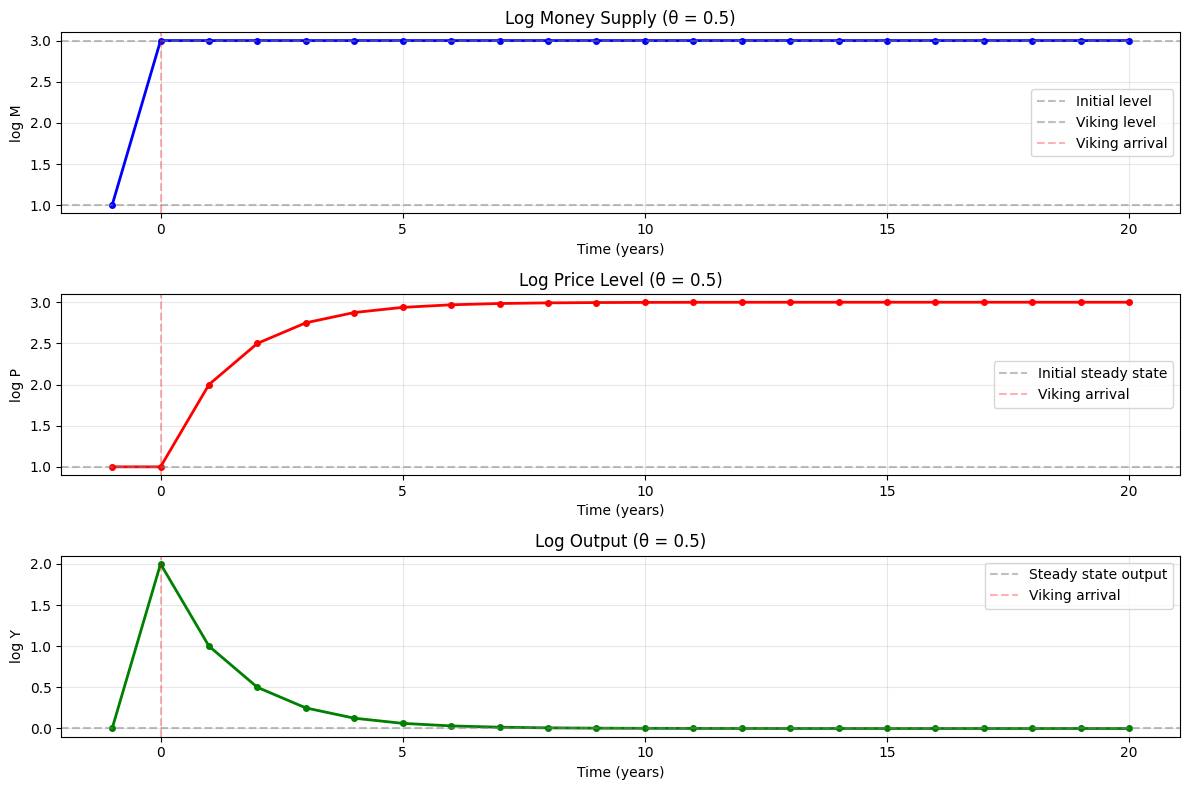

Part (c) Results (θ = 0.5):

Initial steady state (t=-1):
  log M = 1.0000
  log P = 1.0000
  log Y = 0.0000

Immediately after Viking arrival (t=0):
  log M = 3.0000
  log P = 1.0000
  log Y = 2.0000

Final values (t=20):
  log M = 3.0000
  log P = 3.0000
  log Y = 0.0000

Time series data (first 10 periods):
  Time      log M      log P      log Y
------------------------------------------------------------
    -1     1.0000     1.0000     0.0000
     0     3.0000     1.0000     2.0000
     1     3.0000     2.0000     1.0000
     2     3.0000     2.5000     0.5000
     3     3.0000     2.7500     0.2500
     4     3.0000     2.8750     0.1250
     5     3.0000     2.9375     0.0625
     6     3.0000     2.9688     0.0312
     7     3.0000     2.9844     0.0156
     8     3.0000     2.9922     0.0078
     9     3.0000     2.9961     0.0039


In [10]:
theta = 0.5
V_bar = 1  # log V_bar = 0
Y_star = 1  # log Y_star = 0
log_V_bar = np.log(V_bar)
log_Y_star = np.log(Y_star)

# Initial conditions (steady state at t = -1)
log_M_initial = 1  # Before Vikings
log_M_vikings = 3  # After Vikings bring gold at t=0

# Time periods
time = np.arange(-1, 21)  # From t=-1 to t=20
n_periods = len(time)

# Initialize arrays
log_M = np.zeros(n_periods)
log_P = np.zeros(n_periods)
log_Y = np.zeros(n_periods)

# Set initial steady state at t=-1 (index 0)
log_M[0] = log_M_initial
# From part (a): in steady state with log M = 1, log V_bar = 0, log Y = 0
# We have: log M + log V_bar = log P + log Y
# So: 1 + 0 = log P + 0, therefore log P = 1
log_P[0] = 1
log_Y[0] = 0  # Steady state output

# Vikings bring gold at t=0, so from t=0 onwards, log M = 3
for i in range(1, n_periods):
    log_M[i] = log_M_vikings


for i in range(1, n_periods):
    log_Y[i] = log_M[i] + log_V_bar - log_P[i-1]
    log_P[i] = log_P[i-1] + theta * (log_Y[i-1] - log_Y_star)
    log_Y[i] = log_M[i] + log_V_bar - log_P[i]


plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(time, log_M, 'b-', linewidth=2, marker='o', markersize=4)
plt.axhline(y=log_M_initial, color='gray', linestyle='--', alpha=0.5, label='Initial level')
plt.axhline(y=log_M_vikings, color='gray', linestyle='--', alpha=0.5, label='Viking level')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.3, label='Viking arrival')
plt.xlabel('Time (years)')
plt.ylabel('log M')
plt.title('Log Money Supply (θ = 0.5)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(time, log_P, 'r-', linewidth=2, marker='o', markersize=4)
plt.axhline(y=1, color='gray', linestyle='--', alpha=0.5, label='Initial steady state')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.3, label='Viking arrival')
plt.xlabel('Time (years)')
plt.ylabel('log P')
plt.title('Log Price Level (θ = 0.5)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(time, log_Y, 'g-', linewidth=2, marker='o', markersize=4)
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5, label='Steady state output')
plt.axvline(x=0, color='red', linestyle='--', alpha=0.3, label='Viking arrival')
plt.xlabel('Time (years)')
plt.ylabel('log Y')
plt.title('Log Output (θ = 0.5)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

print("Part (c) Results (θ = 0.5):")
print("="*60)
print(f"\nInitial steady state (t=-1):")
print(f"  log M = {log_M[0]:.4f}")
print(f"  log P = {log_P[0]:.4f}")
print(f"  log Y = {log_Y[0]:.4f}")

print(f"\nImmediately after Viking arrival (t=0):")
print(f"  log M = {log_M[1]:.4f}")
print(f"  log P = {log_P[1]:.4f}")
print(f"  log Y = {log_Y[1]:.4f}")

print(f"\nFinal values (t=20):")
print(f"  log M = {log_M[-1]:.4f}")
print(f"  log P = {log_P[-1]:.4f}")
print(f"  log Y = {log_Y[-1]:.4f}")

print("\n" + "="*60)
print("Time series data (first 10 periods):")
print("="*60)
print(f"{'Time':>6} {'log M':>10} {'log P':>10} {'log Y':>10}")
print("-"*60)
for i in range(min(11, len(time))):
    print(f"{time[i]:>6} {log_M[i]:>10.4f} {log_P[i]:>10.4f} {log_Y[i]:>10.4f}")

**Part (d)**

Comment on the transition dynamics and the difference between the two cases.

**Speed of Convergence:**
- **θ = 0.5**: Reaches steady state in ~10-15 years
- **θ = 0.25**: Takes ~20+ years to converge

**Output Boom:**
- Both start with the same boom (log Y = 2)
- θ = 0.5 decays twice as fast as θ = 0.25

**Price Adjustment:**
- **θ = 0.5**: Steeper, faster price increases initially
- **θ = 0.25**: Gradual, smooth price rise over longer period

**Economic Intuition:**
The parameter θ represents **price flexibility**. Higher θ means prices adjust faster to close output gaps, so monetary shocks have shorter-lived real effects. Lower θ means prices are "stickier," allowing monetary policy to affect real output for longer periods.

Both cases demonstrate **long-run monetary neutrality**—eventually all the monetary expansion just raises prices proportionally, with no permanent effect on real output. The difference is purely in the transition dynamics.